In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
##1.产生模拟数据
n_samples = 1000
n_centers = 4
X, y = make_blobs(n_samples=n_samples, centers=n_centers, n_features=2, random_state=40)

In [3]:
##2.模型构建
km = KMeans(n_clusters=n_centers, init='random', random_state=40)
km.fit(X)

KMeans(init='random', n_clusters=4, random_state=40)

In [4]:
##3.效果评估
print("所有样本距离所属簇中心点的总距离和为:%.2f" % km.inertia_)
print("所有样本距离所属簇中心点的平均距离为:%.2f" % (km.inertia_ / n_samples))
print("所有的中心点聚类中心坐标:\n{}".format(np.round(km.cluster_centers_,2)))
print("score其实就是所有样本点离所属簇中心点距离和的相反数:{}".format(np.round(km.score(X),2)))

所有样本距离所属簇中心点的总距离和为:1960.92
所有样本距离所属簇中心点的平均距离为:1.96
所有的中心点聚类中心坐标:
[[-1.83 -8.89]
 [-0.91 -3.77]
 [ 5.88 -4.2 ]
 [ 0.41  2.56]]
score其实就是所有样本点离所属簇中心点距离和的相反数:-1960.92


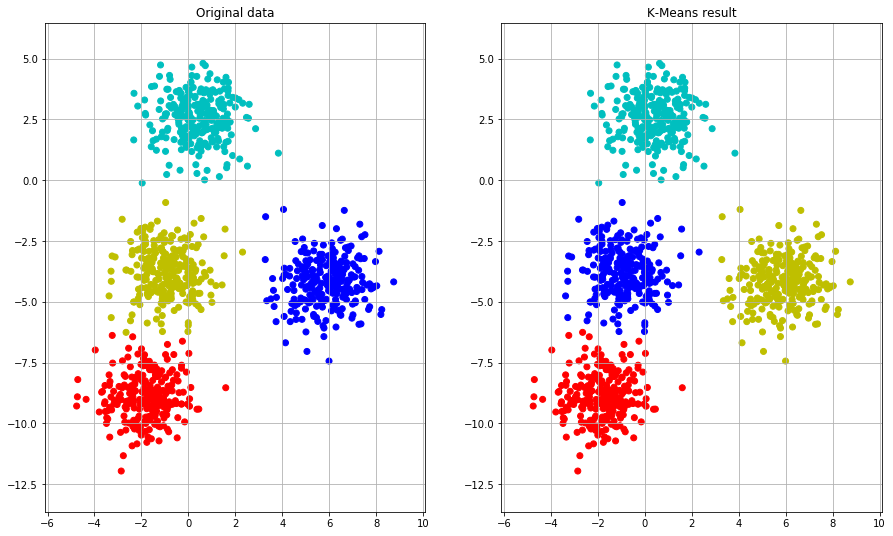

In [5]:
##4.画图
import matplotlib.pyplot as plt
import matplotlib as mpl

def expandBorder(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

x1_min, x2_min = np.min(X, axis=0)
x1_max, x2_max = np.max(X, axis=0)

cm = mpl.colors.ListedColormap(list('rgbmyc'))
plt.figure(figsize=(15, 9))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm)
plt.xlim(expandBorder(x1_min, x1_max))
plt.ylim(expandBorder(x2_min, x2_max))
plt.title(u'Original data')
plt.grid(True)

y_hat = km.predict(X)
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_hat, cmap=cm)
plt.xlim(expandBorder(x1_min, x1_max))
plt.ylim(expandBorder(x2_min, x2_max))
plt.title(u'K-Means result')
plt.grid(True)
